 # Olympics Project

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [1]:
import pandas as pd
import numpy as np

### Read the data

In [2]:
df1=pd.read_csv('athlete_events.csv')
df2=pd.read_csv('noc_regions.csv')

### Don't forget to drop duplicates first

In [4]:
df1=df1.drop_duplicates()
df2=df2.drop_duplicates()

### Find the missing data in each column

In [7]:
missing_df1=df1.isna().sum()
missing_df2=df2.isna().sum()
print(f"Missing data in df1:\n {missing_df1}")
print(f"Missing data in df2:\n {missing_df2}")


Missing data in df1:
 ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64
Missing data in df2:
 NOC         0
region      3
notes     209
dtype: int64


### Number of males and females

In [19]:
gender_counts=df1['Sex'].value_counts()
print("Number of males and females:")
print(gender_counts)

Number of males and females:
Sex
M    195353
F     74378
Name: count, dtype: int64


### How many cities do we have and what are they ?

In [24]:
unique_cities=df1['City'].unique()
unique_cities_num=df1['City'].nunique()

print(f"Number of Cities: {unique_cities_num}")
print(f"cities: {unique_cities}")

Number of Cities: 42
cities: ['Barcelona' 'London' 'Antwerpen' 'Paris' 'Calgary' 'Albertville'
 'Lillehammer' 'Los Angeles' 'Salt Lake City' 'Helsinki' 'Lake Placid'
 'Sydney' 'Atlanta' 'Stockholm' 'Sochi' 'Nagano' 'Torino' 'Beijing'
 'Rio de Janeiro' 'Athina' 'Squaw Valley' 'Innsbruck' 'Sarajevo'
 'Mexico City' 'Munich' 'Seoul' 'Berlin' 'Oslo' "Cortina d'Ampezzo"
 'Melbourne' 'Roma' 'Amsterdam' 'Montreal' 'Moskva' 'Tokyo' 'Vancouver'
 'Grenoble' 'Sapporo' 'Chamonix' 'St. Louis' 'Sankt Moritz'
 'Garmisch-Partenkirchen']


### Find the number of athlete for each year

In [28]:
athlete_num=df1.groupby('Year').size()
print('Number of athletes per year ',athlete_num)

Number of athletes per year  Year
1896      380
1900     1898
1904     1301
1906     1733
1908     3069
1912     4040
1920     4292
1924     5570
1928     5238
1932     2817
1936     7146
1948     7383
1952     9358
1956     6434
1960     9235
1964     9480
1968    10479
1972    11959
1976    10502
1980     8937
1984    11588
1988    14676
1992    16413
1994     3160
1996    13780
1998     3605
2000    13821
2002     4109
2004    13443
2006     4382
2008    13602
2010     4402
2012    12920
2014     4891
2016    13688
dtype: int64


### Which athlete participated the most? (his/her name and ID)

In [29]:
athletes_participation=df1.groupby(['ID','Name']).size()
most_participations=athletes_participation.max()
most_participated_athlete=athletes_participation[athletes_participation==most_participations]
print(f"The athlete with the most participations is {most_participated_athlete.index[0][1]} (ID: {most_participated_athlete.index[0][0]}) with {most_participations} participations.")




The athlete with the most participations is Heikki Ilmari Savolainen (ID: 106296) with 39 participations.


### Find the number of each medal for each year.
##### The output should look like this 
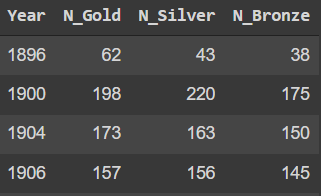

In [32]:
medals_df=df1.dropna(subset=['Medal'])
medals_count=medals_df.groupby(['Year','Medal']).size().unstack(fill_value=0)
medals_count=medals_count.rename(columns={'Gold':'N-Gold','Silver':'N-Silver','Bronze':'N-Bronze'})
print(medals_count)

Medal  N-Bronze  N-Gold  N-Silver
Year                             
1896         38      62        43
1900        175     198       220
1904        150     173       163
1906        145     157       156
1908        256     294       281
1912        300     326       315
1920        367     493       448
1924        311     332       319
1928        281     275       267
1932        232     261       246
1936        330     348       347
1948        325     330       332
1952        347     351       335
1956        348     353       342
1960        357     359       342
1964        401     408       406
1968        421     425       410
1972        485     474       455
1976        518     508       505
1980        542     529       531
1984        576     571       551
1988        637     607       601
1992        710     663       657
1994        112     110       109
1996        629     608       605
1998        150     145       145
2000        680     663       661
2002        15

### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

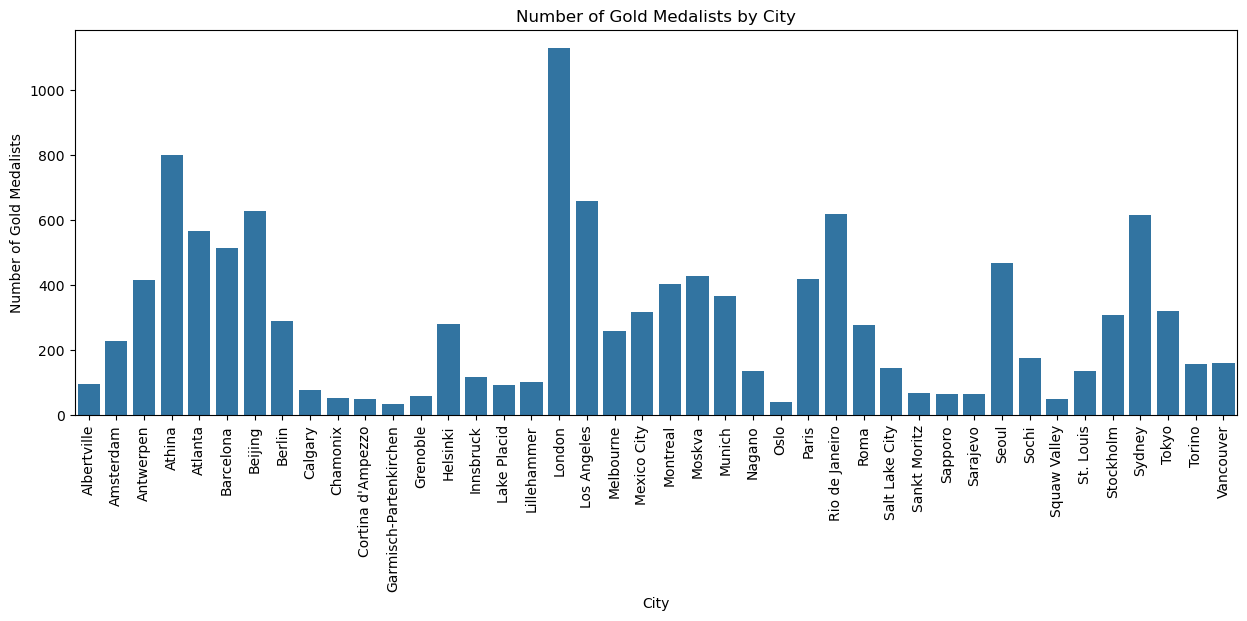

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns 

gold_medalists=df1[df1['Medal']=='Gold']

gold_medals_by_city=gold_medalists.groupby('City')['ID'].nunique()

plt.figure(figsize=(15,5))

sns.barplot(x=gold_medals_by_city.index, y=gold_medals_by_city.values)

plt.title('Number of Gold Medalists by City')

plt.xlabel('City')

plt.ylabel('Number of Gold Medalists')

plt.xticks(rotation=90)

plt.show()

### Find the total missing data for each year?

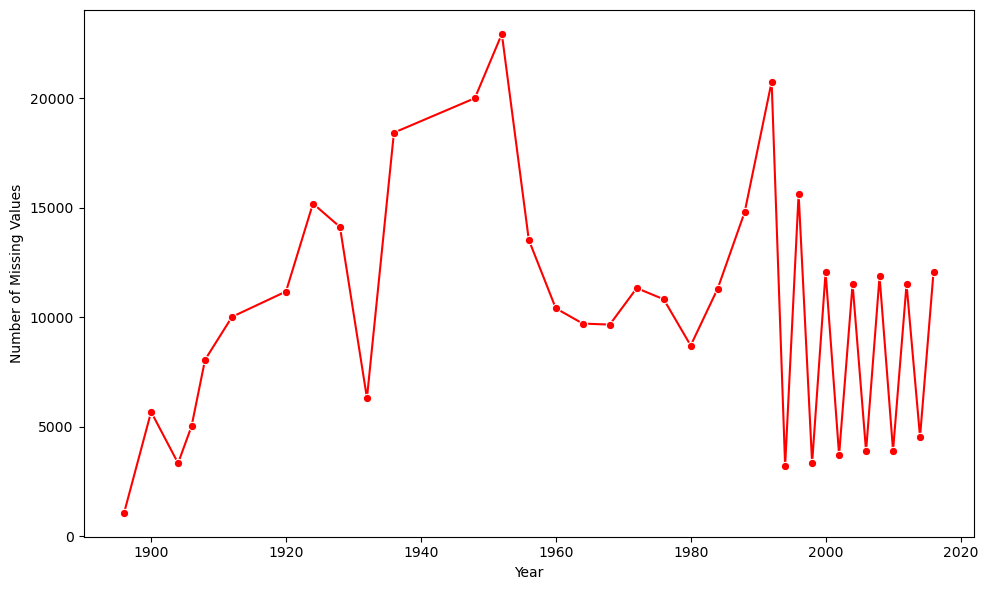

In [37]:
missing_data_per_year=df1.isna().sum(axis=1).groupby(df1['Year']).sum()

missing_data_df=missing_data_per_year.reset_index()
missing_data_df.columns=['Year','Missing Values']

plt.figure(figsize=(10,6))

sns.lineplot(data=missing_data_df, x='Year', y='Missing Values', marker='o', color='red')


plt.xlabel('Year')
plt.ylabel('Number of Missing Values')

plt.tight_layout()
plt.show()


### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

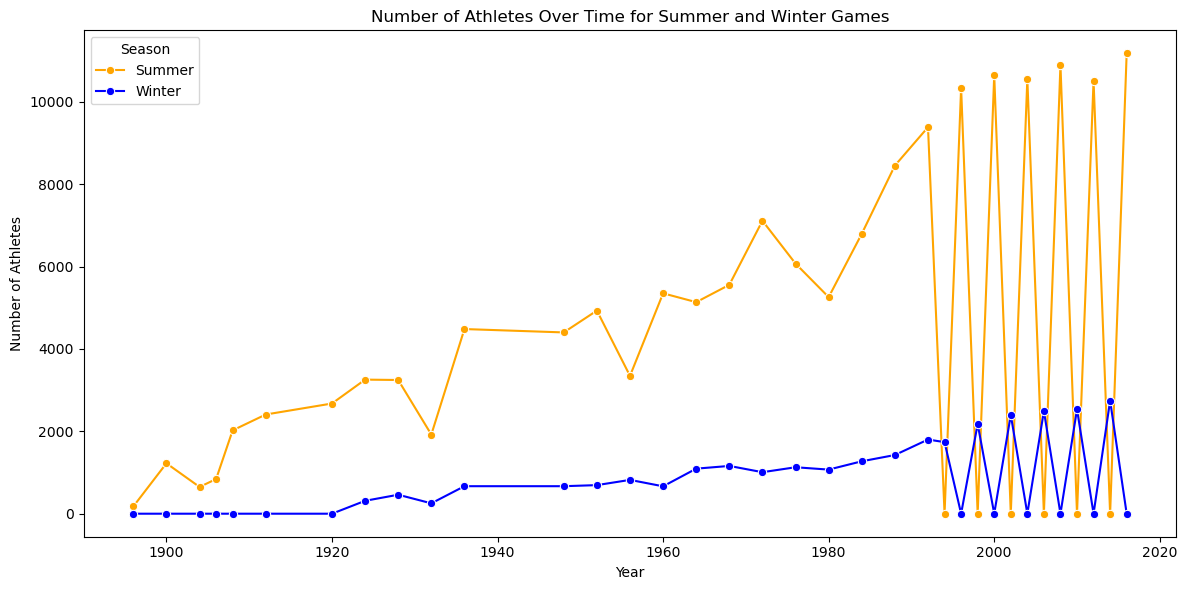

In [ ]:
summer_athletes=df1[df1['Season']=='Summer']
winter_athletes=df1[df1['Season']=='Winter']

summer_counts=summer_athletes.groupby('Year')['ID'].nunique()
winter_counts=winter_athletes.groupby('Year')['ID'].nunique()

athletes_counts_df=pd.DataFrame({
    'Summer':summer_counts,
    'Winter':winter_counts
}).fillna(0)

plt.figure(figsize=(12,6))

sns.lineplot(data=athletes_counts_df, x=athletes_counts_df.index, y='Summer', label='Summer', marker='o', color='orange')
sns.lineplot(data=athletes_counts_df, x=athletes_counts_df.index, y='Winter', label='Winter', marker='o', color='blue')

plt.title('Number of Athletes Over Time for Summer and Winter Games')

plt.xlabel('Year')
plt.ylabel('Number of Athletes')

plt.legend(title='Season')

plt.tight_layout()
plt.show()

"""
Report: Changes in the Number of Athletes Over Time
The visualization shows a steady increase in the number of athletes in the Summer Games over the years, with notable growth after 1980. In contrast, the Winter Games show a slower but consistent rise in participation.

The gap between the two seasons remains significant, with the Summer Games always having more athletes. After 2000, some fluctuations are visible, which may indicate irregularities in data.

Overall, both seasons show growth in athlete participation over time.

"""